### The Spark Foundation Intern
## - Yadu Sharma

## Task 2-Prediction Using Unsupervised ML


### Objective:
#### The main goal of this project is to apply unsupervised learning, specifically K-means clustering, to the Iris dataset. Determine the optimal number of clusters in the dataset and then visually represent these clusters.

In [46]:
# Importing necessaries liberaries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [47]:
# Load the dataset from the CSV file
iris_data = pd.read_csv('iris.csv')

In [48]:
# Display the first few rows of the dataset
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Exploration

In [49]:
# Check for missing values
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [50]:
# Basic statistical summary of the dataset
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [51]:
# Class distribution (for labeled datasets)
class_distribution = iris_data['Species'].value_counts()
print("\nClass Distribution:\n", class_distribution)


Class Distribution:
 Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


## Determine the Optimal Number of Clusters (K)
In this step, we will use the Elbow Method to find the optimal number of clusters (K) for K-means clustering. The Elbow Method involves running K-means clustering for a range of K values and plotting the Within-Cluster Sum of Squares (WCSS) to identify the "elbow" point where the rate of change in WCSS starts to slow down. This point indicates the optimal number of clusters.

In [52]:
# Extract the feature columns (exclude the 'Id' and 'Species' columns)
X = iris_data.iloc[:, [1, 2, 3, 4]].values

In [53]:
# Initialize an empty list to store the WCSS values for different K values
wcss = []

In [54]:
import warnings

# Filter out the specific warning related to KMeans memory leak
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")


# Determine the optimal number of clusters (K) using the Elbow Method
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

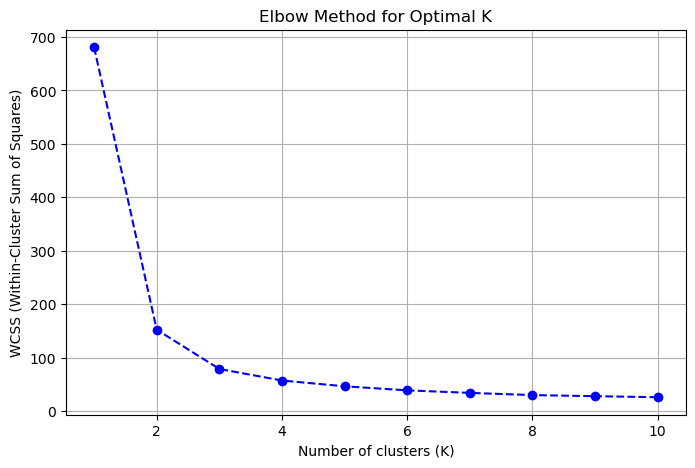

In [55]:
# Create an array of K values (from 1 to 10)
k_values = range(1, 11)

# Plot the Elbow Method curve
plt.figure(figsize=(8, 5))
plt.plot(list(k_values), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

## Perform K-Means Clustering with Optimal K
In this step, we will perform K-means clustering using the optimal number of clusters (K=3) that we determined using the Elbow Method. We'll fit the K-means model to the data and assign each data point to a cluster. 

In [56]:
# Use the actual optimal K value obtained from the Elbow Method (e.g., K=3)
optimal_k = 3

# Initialize the K-means model with the optimal K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the K-means model to the data
kmeans.fit(X)

# Add a new column 'Cluster' to the dataset indicating the cluster assignment for each data point
iris_data['Cluster'] = kmeans.labels_

# Display the first few rows of the dataset with the 'Cluster' column
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [57]:
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,0


## Analysis & Visualization

In [58]:
# 1. Cluster Size Analysis
cluster_sizes = iris_data['Cluster'].value_counts().sort_index()
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
0    62
1    50
2    38
Name: Cluster, dtype: int64


In [59]:
# 2. Cluster Statistics
cluster_stats = iris_data.groupby('Cluster').agg({
    'SepalLengthCm': ['mean', 'median', 'std'],
    'SepalWidthCm': ['mean', 'median', 'std'],
    'PetalLengthCm': ['mean', 'median', 'std'],
    'PetalWidthCm': ['mean', 'median', 'std'],
}).round(2)
print("\nCluster Statistics:")
print(cluster_stats)


Cluster Statistics:
        SepalLengthCm              SepalWidthCm              PetalLengthCm  \
                 mean median   std         mean median   std          mean   
Cluster                                                                      
0                5.90    5.9  0.47         2.75    2.8  0.30          4.39   
1                5.01    5.0  0.35         3.42    3.4  0.38          1.46   
2                6.85    6.7  0.49         3.07    3.0  0.29          5.74   

                     PetalWidthCm               
        median   std         mean median   std  
Cluster                                         
0         4.50  0.51         1.43    1.4  0.30  
1         1.50  0.17         0.24    0.2  0.11  
2         5.65  0.49         2.07    2.1  0.28  


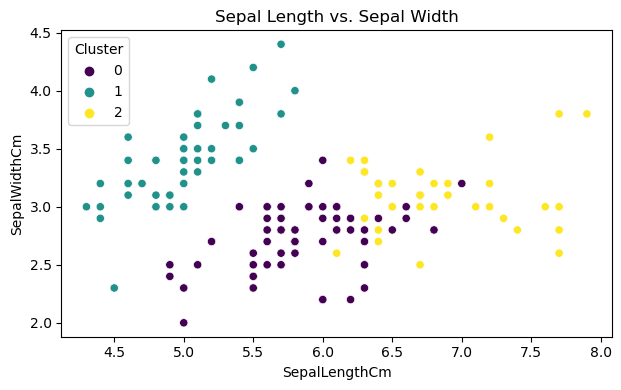

In [64]:
# 3.Scatter Plots
import seaborn as sns
plt.figure(figsize=(12, 4))

# Scatter Plot: Sepal Length vs. Sepal Width
plt.subplot(1, 2, 1)
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Cluster', data=iris_data, palette='viridis')
plt.title('Sepal Length vs. Sepal Width')
plt.tight_layout()
plt.show()

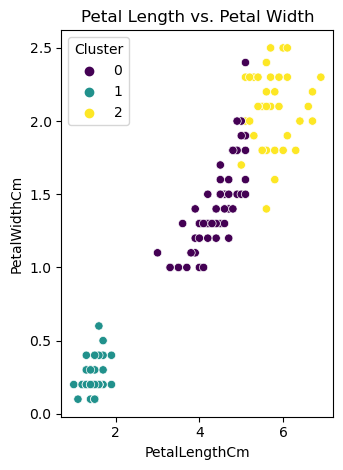

In [63]:
# Scatter Plot: Petal Length vs. Petal Width
plt.subplot(1, 2, 2)
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Cluster', data=iris_data, palette='viridis')
plt.title('Petal Length vs. Petal Width')

plt.tight_layout()
plt.show()

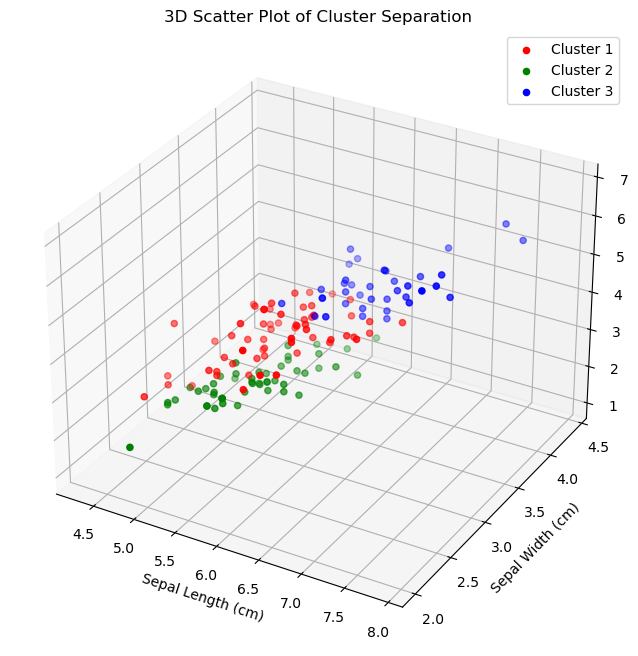

In [65]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each cluster (you can modify this depending on your cluster labels)
colors = ['r', 'g', 'b']

# Iterate through clusters and plot data points
for cluster_label, color in zip(range(optimal_k), colors):
    cluster_data = iris_data[iris_data['Cluster'] == cluster_label]
    ax.scatter(cluster_data['SepalLengthCm'], cluster_data['SepalWidthCm'], cluster_data['PetalLengthCm'], c=color, label=f'Cluster {cluster_label + 1}')

# Customize the plot
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Scatter Plot of Cluster Separation')
ax.legend()

# Show the plot
plt.show()

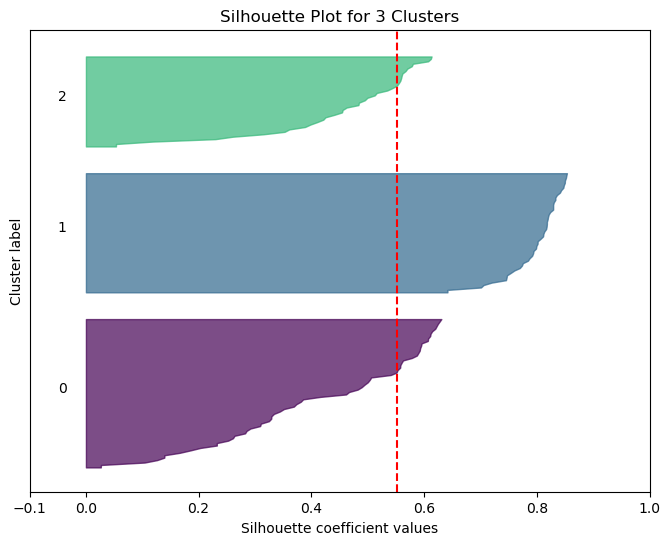

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate silhouette scores for each sample
silhouette_avg = silhouette_score(X, iris_data['Cluster'])
sample_silhouette_values = silhouette_samples(X, iris_data['Cluster'])

# Create a subplot with 1 row and 1 column
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (optimal_k + 1) * 10])

y_lower = 10

for i in range(optimal_k):
    # Aggregate the silhouette scores for samples belonging to cluster i and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[iris_data['Cluster'] == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / optimal_k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10

ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# Add a title to the plot
ax1.set_title(f"Silhouette Plot for {optimal_k} Clusters")
plt.show()

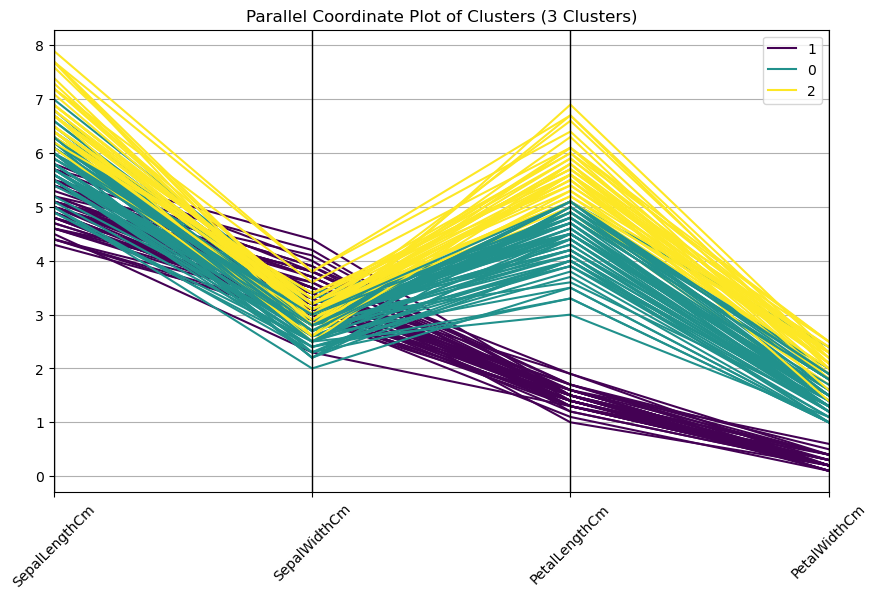

In [69]:
from pandas.plotting import parallel_coordinates

# Select a subset of columns for parallel coordinate plot
selected_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Cluster']
iris_subset = iris_data[selected_columns]

# Create a parallel coordinate plot
plt.figure(figsize=(10, 6))
parallel_coordinates(iris_subset, 'Cluster', colormap=plt.cm.viridis)
plt.title(f"Parallel Coordinate Plot of Clusters ({optimal_k} Clusters)")
plt.xticks(rotation=45)
plt.show()

## Conclusion
In this project, we applied K-means clustering to the Iris dataset to determine the optimal number of clusters (K=3) and visually represent these clusters. We conducted data exploration, found the optimal K using the Elbow Method, performed K-means clustering, and visualized the results through scatter plots, Silhouette Plot, Parallel Coordinate Plot of Clusters. This project showcases the power of unsupervised learning for pattern discovery in data.